In [ ]:
!pip install spacy
!pip install newsapi-python
!python -m spacy download en_core_web_lg
!pip3 install pytz



[{'status': 'ok', 'totalResults': 22364, 'articles': [{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Lauren Hilgers, John Woo, Aaron Esposito, Jack D’Isidoro, Marion Lozano and Zachary Mouton', 'title': 'The Sunday Read: ‘Nurses Have Finally Learned What They’re Worth’', 'description': 'As the coronavirus spread, demand for nurses came from every corner. Some traveling jobs paid more than $10,000 a week. Will the boom last?', 'url': 'https://www.nytimes.com/2022/03/27/podcasts/the-daily/nursing-pandemic-sunday-read.html', 'urlToImage': 'https://static01.nyt.com/images/2022/02/06/magazine/27daily-audm-1/06mag-NSO-1-facebookJumbo.jpg', 'publishedAt': '2022-03-27T10:00:07Z', 'content': 'There are a lot of ways to listen to The Daily. Heres how.\r\nWe want to hear from you. Tune in, and tell us what you think. Email us at thedaily@nytimes.com. Follow Michael Barbaro on Twitter: @mikieb… [+501 chars]'}, {'source': {'id': None, 'name': 'New York Times'}, 'author': 'Joseph Berg

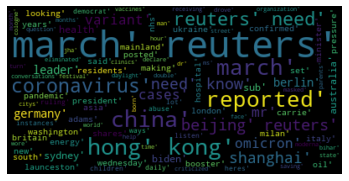

In [26]:
import spacy
import en_core_web_lg
import pandas as pd
import matplotlib.pyplot as plt
from newsapi.newsapi_client import NewsApiClient
from datetime import date, timedelta
from wordcloud import WordCloud
from collections import Counter
from string import punctuation

 
# Automatically get the correct date range
today_date = date.today()
# The API will not accept 30 days exactly, so I am looking at the last 28 days
#   "Your plan permits you to request articles as far back as 2022-02-27, but 
#   you have requested 2022-02-27. You may need to upgrade to a paid plan."
article_date_min = today_date - timedelta(28)

# YYYY-MM-DD
today_date = today_date.strftime("%Y-%m-%d")
article_date_min = article_date_min.strftime("%Y-%m-%d")
#print("today =", today_date)
#print("last month =", article_date_min)

# Given Code
nlp = en_core_web_lg.load()
newsapi = NewsApiClient(api_key='feaee85415714d7d9221964aedc57525')

def getMonthArticles(x):
  # Given Code
  temp = newsapi.get_everything(q='coronavirus', language='en', 
                                from_param=article_date_min, to=today_date,
                                sort_by='relevancy', page=x)
  return temp


articles = list(map(getMonthArticles, range(1, 6)))
print(articles)


dados = []

# Given Code
for i, article in enumerate(articles):
  for x in article['articles']:
    title = x['title']
    description = x['description']
    content = x['content']
    dados.append({'title': title, 'desc': description, 'content': content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

results = []


def get_keywords_eng(text):
  result = []
  pos_tag = ['PROPN', 'VERB', 'NOUN']
  doc = nlp(text.lower())
  for token in doc:
    # Given Code
    if (token.text in nlp.Defaults.stop_words or token.text in punctuation):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)
  print(result)
  return result

# Given Code
for content in df.content.values:
  results.append([('#' + x[0]) for x in 
                  Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

# Given Code
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()